# #Diamond Price Prediction
### 1. Statistical Analysis
### 2. Feature Engineering
### 3. Exploratory Data Analysis (EDA)

In [75]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [77]:
%run Libraries.ipynb

In [78]:
%run Utility_tools.ipynb

In [76]:
raw = pd.read_csv('diamonds.csv')
df = deepcopy(raw)

In [79]:
df.sample(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
485,0.73000,Premium,D,SI1,61.70000,55.00000,2821,5.84000,5.82000,3.60000
28057,0.38000,Ideal,F,SI1,62.20000,54.00000,660,4.64000,4.66000,2.89000
25994,1.53000,Premium,F,VS1,60.30000,58.00000,15217,7.51000,7.48000,4.52000
39136,0.41000,Ideal,G,VS2,62.10000,57.00000,1061,4.78000,4.72000,2.95000
46017,0.53000,Ideal,E,VS2,61.00000,57.00000,1727,5.26000,5.23000,3.20000
30921,0.34000,Very Good,E,VS2,62.80000,58.00000,745,4.43000,4.45000,2.79000


In [7]:
#First of all, our data is vast, so let's shrink it's memory usage and continue 
display(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.2 MB


None

In [80]:
reduce_memory_usage(df)

Memory usage before: 4.12 MB
Memory usage now : 0.88 MB
Memory usage decreased by 78.7%


In [94]:
continuous_features = list(df.select_dtypes(include='number').columns)
continuous_features

['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size_volume']

In [10]:
def plot_hist(data):
    for column in data[continuous_features]:
        sns.displot(df[column], bins=30)
    plt.show();

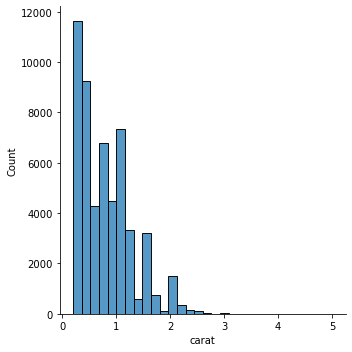

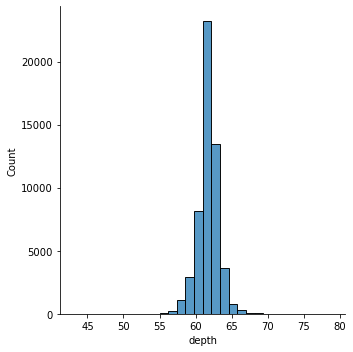

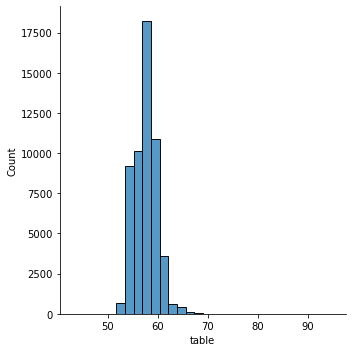

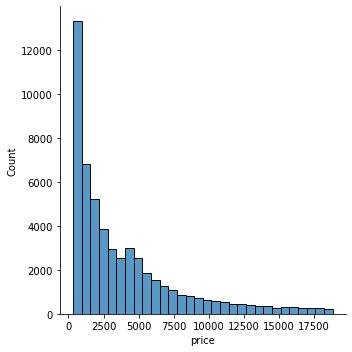

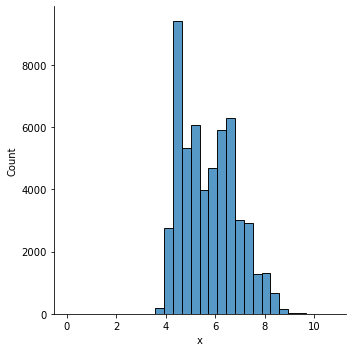

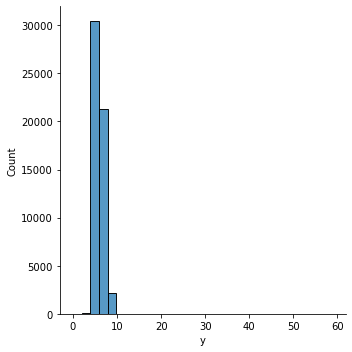

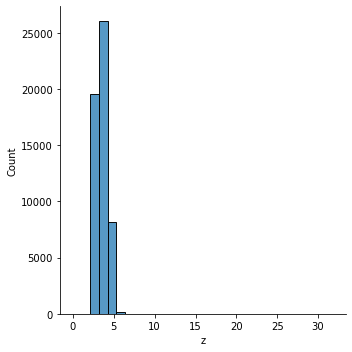

In [30]:
plot_hist(df)

In [19]:
def normality_visual(data):
    for column in data.columns:
        fig = qqplot(data[column], line = '45', fit=True)
        ax = plt.gca() 
        fig.set_size_inches(15, 8) 
        ax.set_xlabel('Theoretical Quantiles', fontsize=13)
        ax.set_ylabel(f'Sample Quantiles of the {column} column', fontsize=13)
        plt.show()

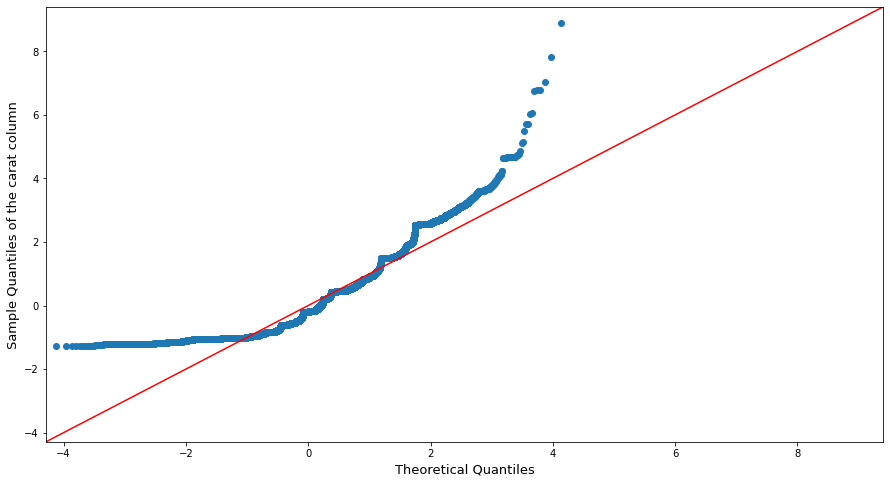

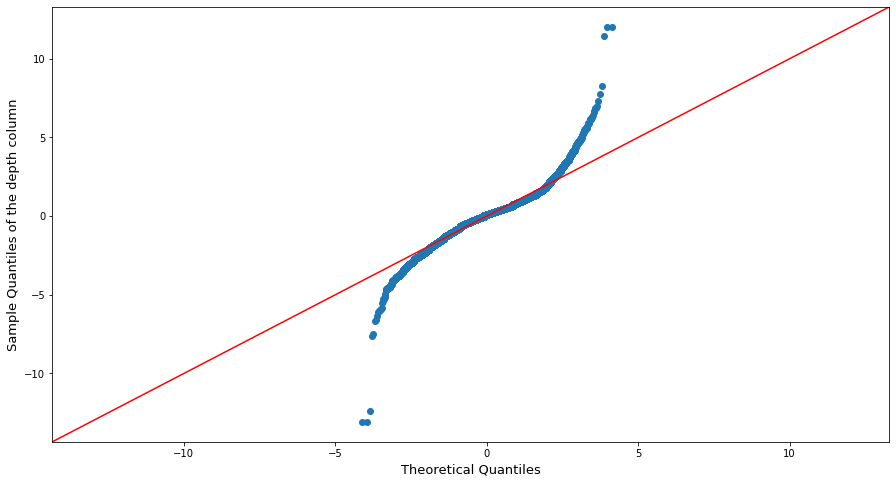

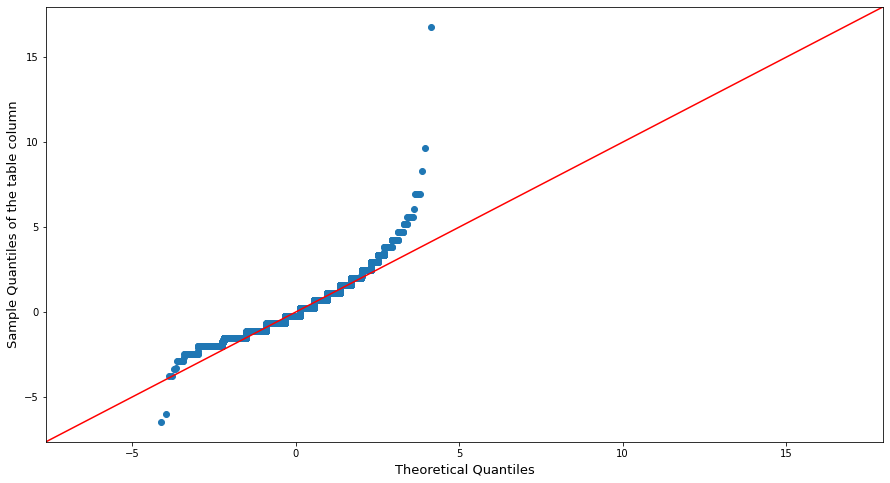

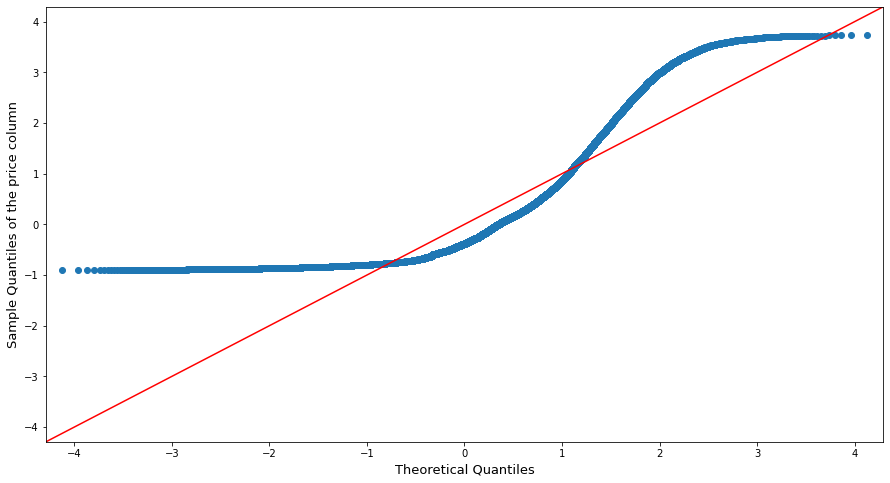

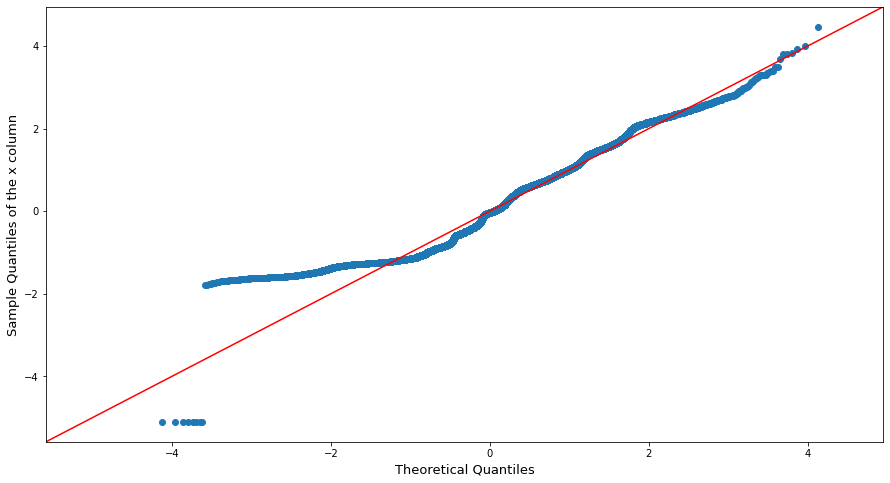

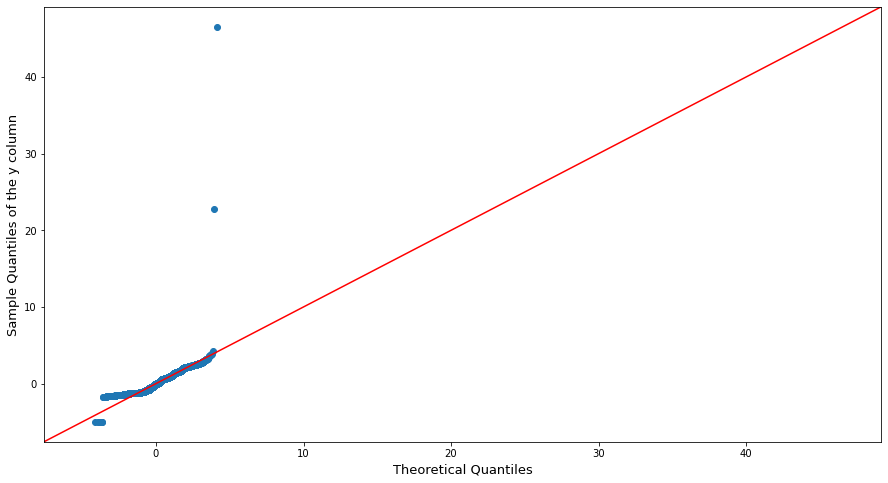

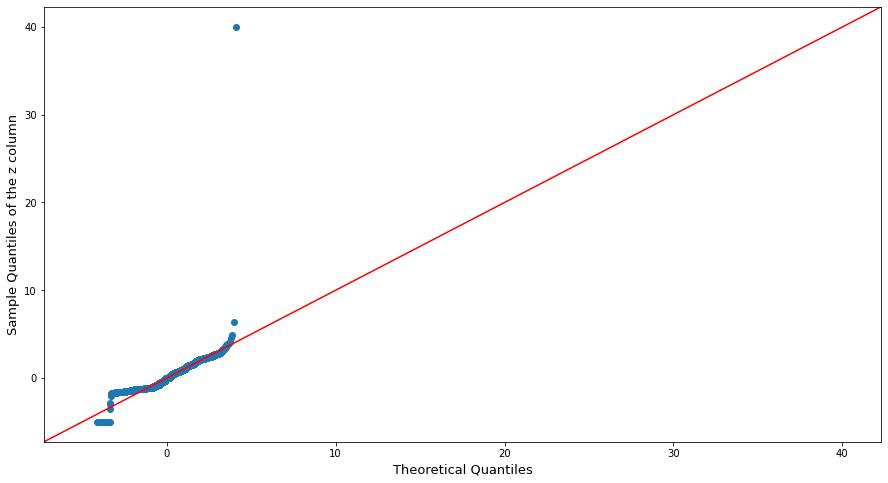

In [20]:
normality_visual(df[continuous_features])

In [28]:
def normality_test(data):
    for column in data[continuous_features]:
        print(f'''P-value for {column} column: {shapiro(data[column])[1]}\n''')

In [29]:
normality_test(df)

P-value for carat column: 0.0

P-value for depth column: 0.0

P-value for table column: 0.0

P-value for price column: 0.0

P-value for x column: 0.0

P-value for y column: 0.0

P-value for z column: 0.0



In [95]:
def find_outliers_iqr(data, outlier_range_val=1.5):
    for column in data.select_dtypes(include='number'):
        Q3 = data[column].quantile(q = 0.75)
        Q1 = data[column].quantile(q = 0.25)
        IQR = Q3 - Q1
        outlier_range = IQR * outlier_range_val
        upperlimit = Q3 + outlier_range
        lowerlimit = Q1 - outlier_range
        no_outliers = data.loc[(data[column]>upperlimit) | (data[column]<lowerlimit)].shape[0]
        print(f'''Number of outlier records in {column} column: {no_outliers}''')   

In [96]:
find_outliers_iqr(df)

Number of outlier records in carat column: 0
Number of outlier records in depth column: 0
Number of outlier records in table column: 0
Number of outlier records in price column: 3540
Number of outlier records in x column: 0
Number of outlier records in y column: 0
Number of outlier records in z column: 0
Number of outlier records in size_volume column: 1318


In [84]:
def coerce_outliers(value):
    if value > upperlimit:
        value = upperlimit
    elif value < lowerlimit:
        value = lowerlimit
    return value

for feature in df[continuous_features].columns:
    if feature!='price':
        Q3 = df[feature].quantile(q = 0.75)
        Q1 = df[feature].quantile(q = 0.25)
        IQR = Q3 - Q1 
        outlier_range = IQR * 1.5
        upperlimit = Q3 + outlier_range
        lowerlimit = Q1 - outlier_range
        df[feature] = df[feature].apply(coerce_outliers) 

In [39]:
def linearity_corr(data, column1: str, column2: str):
    sns.regplot(x = column1, y = column2, data=data, color='b') 
    plt.show()

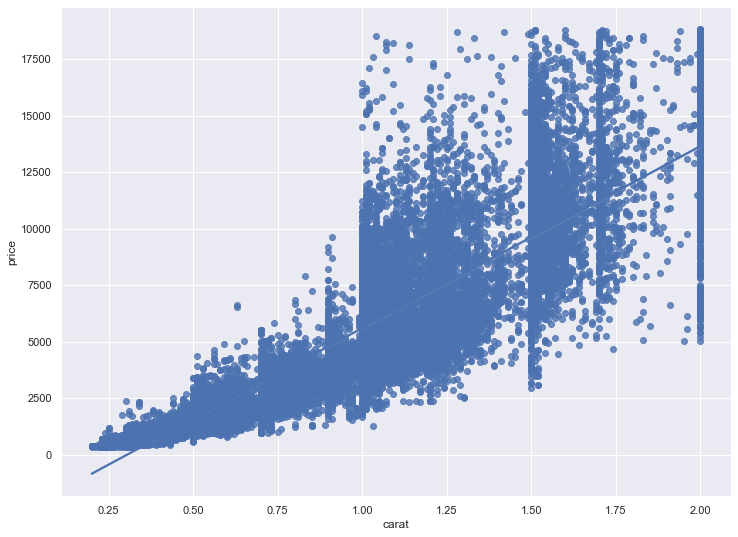

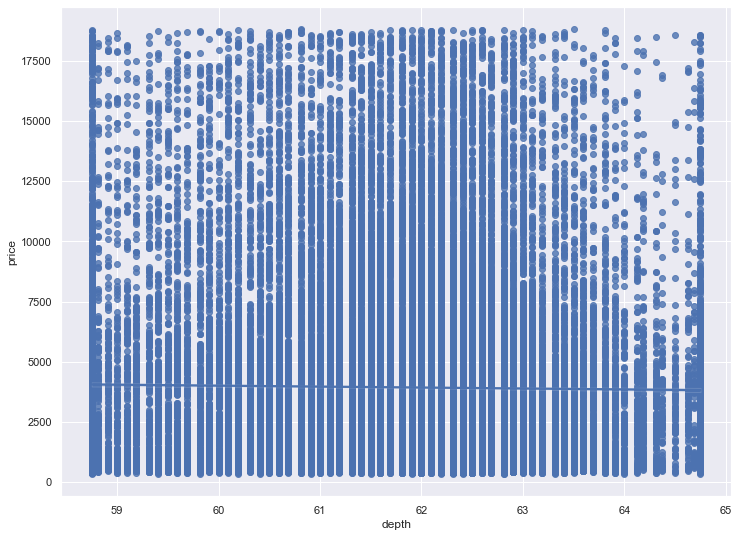

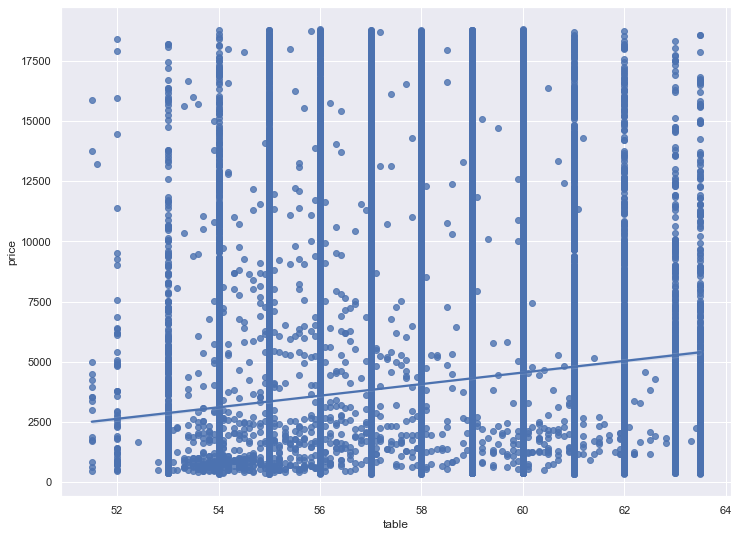

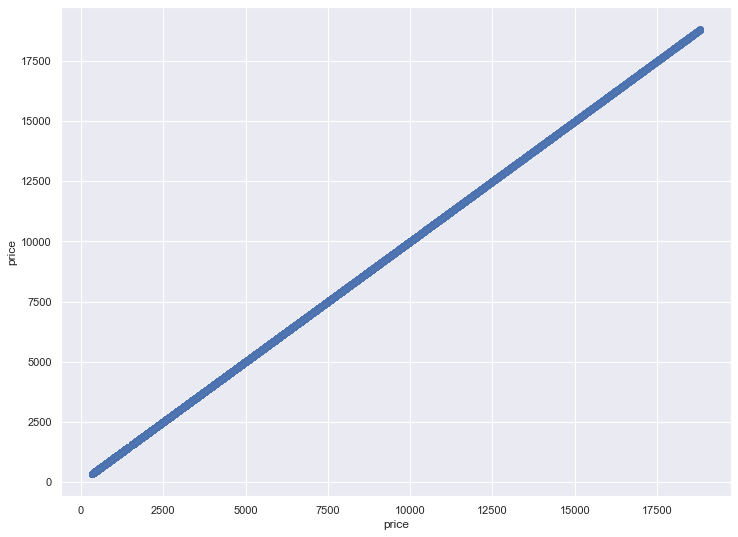

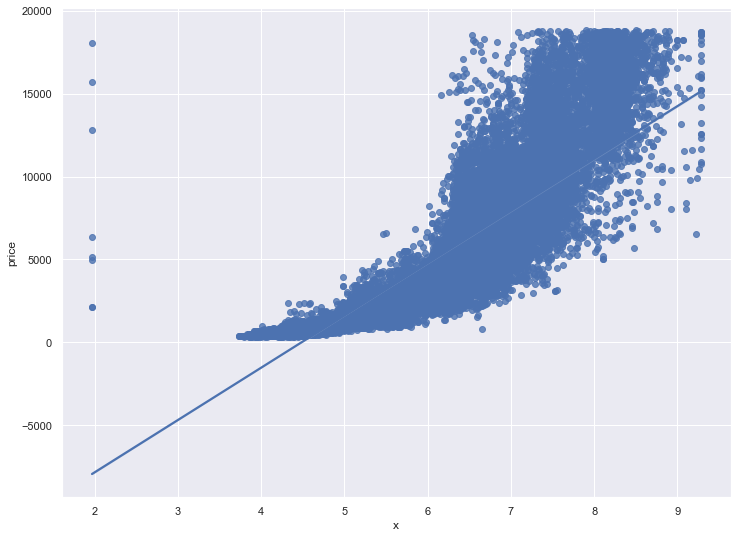

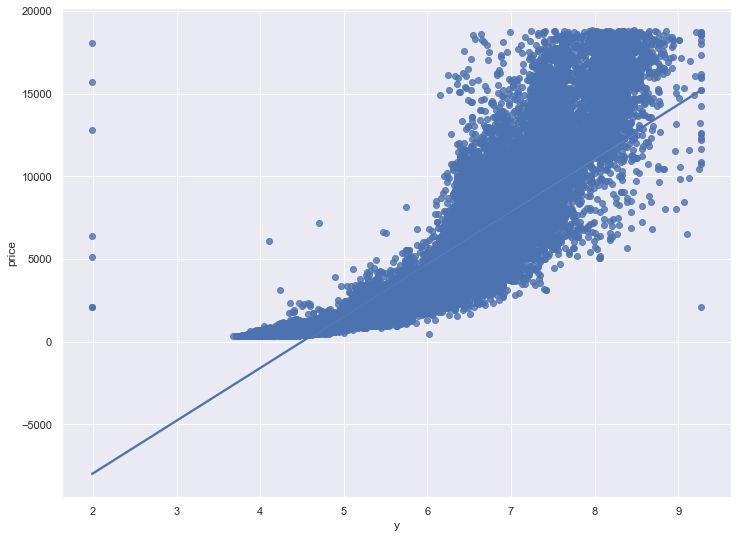

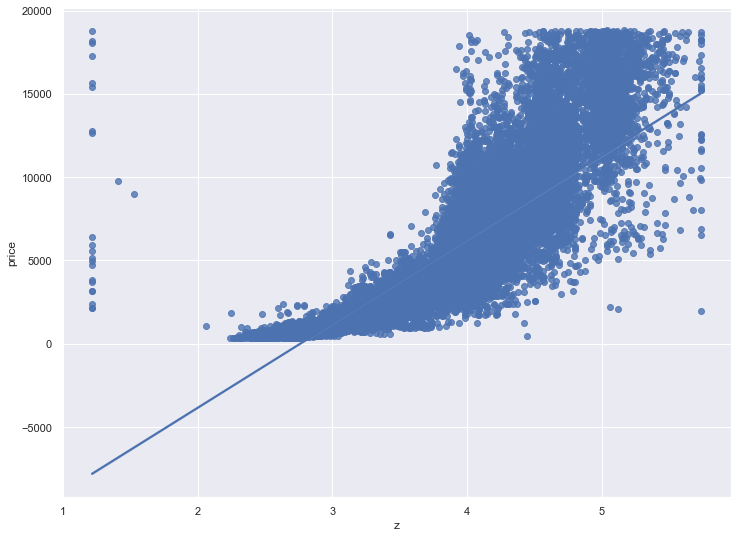

In [40]:
for feat in continuous_features:
    linearity_corr(df, column1=feat, column2='price')

In [85]:
#Only table and depth features have little to no linear affect to price 
df[continuous_features].corr(method='spearman')['price'].to_frame().sort_values(by='price', ascending=False).iloc[1:,:]

,price
x,0.96320
carat,0.96290
y,0.96272
z,0.95723
table,0.17178
depth,0.00999


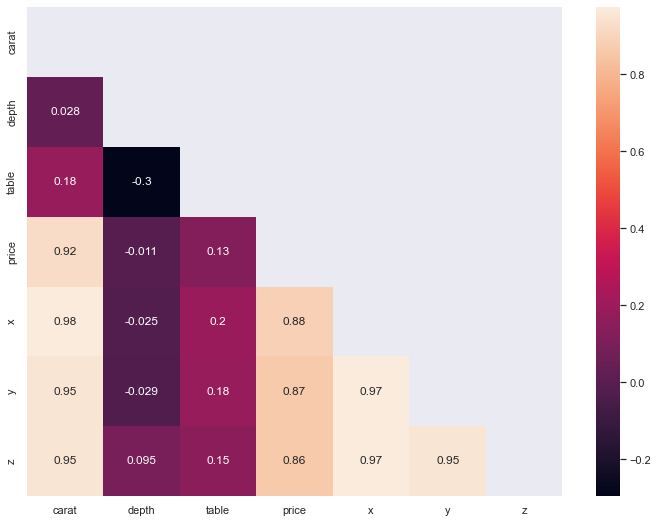

In [18]:
plot_heatmap(df) #We notice high correlation between x,y,z and carat features

In [86]:
vif = handle_vif(df)

In [87]:
vif.compute_vif([col for col in df[continuous_features].columns if col!='price'])

,Variable,VIF
0,carat,30.33512
1,depth,2.84977
2,table,1.16455
3,x,353.18113
4,y,339.95694
5,z,116.86816


In [ ]:
#vif.drop_high_vif()

In [88]:
from sklearn.feature_selection import VarianceThreshold
print(df[continuous_features].shape)     
var_filter = VarianceThreshold(threshold = 0.0)  
train = var_filter.fit_transform(df[continuous_features])
print(train.shape)  #All features remained  

(53940, 7)
(53940, 7)


In [89]:
df.depth.nunique() 

62

In [90]:
df.table.nunique()

107

In [91]:
df['size_volume'] = df['x']*df['y']*df['z'] #Engineering a new feature

In [92]:
df.corr(method='spearman') #Higher correlation achieved

,carat,depth,table,price,x,y,z,size_volume
carat,1.00000,0.03004,0.19507,0.96290,0.99610,0.99556,0.99318,0.99743
depth,0.03004,1.00000,-0.24496,0.00999,-0.02346,-0.02544,0.10341,0.01380
table,0.19507,-0.24496,1.00000,0.17178,0.20223,0.19573,0.15988,0.18219
price,0.96290,0.00999,0.17178,1.00000,0.96320,0.96272,0.95723,0.96300
x,0.99610,-0.02346,0.20223,0.96320,1.00000,0.99789,0.98736,0.99763
y,0.99556,-0.02544,0.19573,0.96272,0.99789,1.00000,0.98707,0.99757
z,0.99318,0.10341,0.15988,0.95723,0.98736,0.98707,1.00000,0.99417
size_volume,0.99743,0.01380,0.18219,0.96300,0.99763,0.99757,0.99417,1.00000


In [269]:
ordinal_features = list(df.select_dtypes(include='category').columns)

In [270]:
le = LabelEncoder()
for feat in ordinal_features:
    df[feat] = le.fit_transform(df[feat])

In [271]:
ordinal_features.append('price')

In [ ]:
#It turns out only the first four continuous features are significant characteristics
df[ordinal_features].corr(method='spearman')['price'].to_frame().sort_values(by='price', ascending=False).iloc[1:,:]

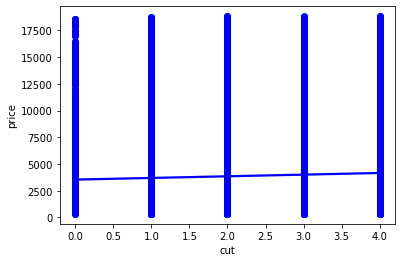

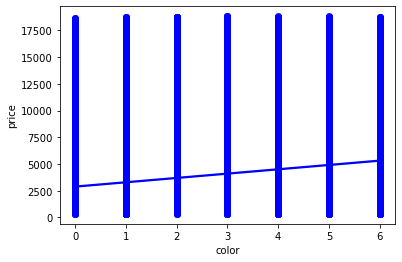

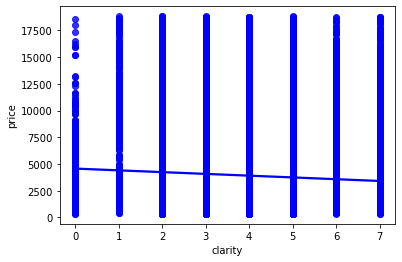

In [277]:
for feat in ordinal_features[:-1]: #checking monotonicity 
    linearity_corr(df, column1=feat, column2='price')

In [97]:
def coerce_outliers(value): #coerce the new column's outliers as well
    if value > upperlimit:
        value = upperlimit
    elif value < lowerlimit:
        value = lowerlimit
    return value

for feature in df[continuous_features].columns:
    if feature!='price':
        Q3 = df[feature].quantile(q = 0.75)
        Q1 = df[feature].quantile(q = 0.25)
        IQR = Q3 - Q1 
        outlier_range = IQR * 1.5
        upperlimit = Q3 + outlier_range
        lowerlimit = Q1 - outlier_range
        df[feature] = df[feature].apply(coerce_outliers) 

In [100]:
df.describe() #The newly engineered column size_volume has a much more significant variance

,carat,depth,table,price,x,y,z,size_volume
count,53940.00000,53940.00000,53940.00000,53940.00000,53940.00000,53940.00000,53940.00000,53940.00000
mean,0.79255,61.74936,57.43855,3932.79972,5.73128,5.73330,3.53853,129.02093
std,0.45709,1.27047,2.16115,3989.43974,1.11995,1.11195,0.69248,74.04203
min,0.19995,58.75000,51.50000,326.00000,1.96875,1.98828,1.21680,4.76306
25%,0.39990,61.00000,56.00000,950.00000,4.71094,4.71875,2.91016,65.16105
50%,0.70020,61.81250,57.00000,2401.00000,5.69922,5.71094,3.52930,114.80782
75%,1.04004,62.50000,59.00000,5324.25000,6.53906,6.53906,4.03906,170.83209
max,2.00024,64.75000,63.50000,18823.00000,9.28125,9.26953,5.73242,329.33865


##### The ready data for modeling. Depending on the model that is built, different combination of features will be chosen. 

In [104]:
df.sample(4) 

,carat,cut,color,clarity,depth,table,price,x,y,z,size_volume
13149,0.89990,Ideal,E,VS2,62.00000,59.00000,5439,6.17188,6.21094,3.83984,147.19323
36468,0.38989,Very Good,G,VVS1,63.18750,57.00000,943,4.62109,4.64844,2.92969,62.93222
22438,1.53027,Very Good,H,SI1,61.09375,57.00000,10468,7.44141,7.44922,4.55078,252.26192
47610,0.64014,Ideal,H,SI1,61.81250,55.00000,1880,5.55859,5.57031,3.43945,106.49615


In [105]:
df.to_csv('diamond_pred.csv') #Saving the data. Modeling is done in google.colab 